<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/ANN_Final_With_ConFusing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
#Loading Dataset
data = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv")

In [ ]:
X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

In [ ]:
#Encoding Categorical the sleep_stage
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
Y = np.array(LE1.fit_transform(Y))

In [ ]:
#Encoding Categorical variable Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
len(X_train)

86760

In [ ]:
len(X_test)

21691

In [ ]:
X_train.shape


(86760, 215)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(215,), activation='relu'), # input layer
    keras.layers.Dense(350, activation='sigmoid'),
    keras.layers.Dense(250, activation='sigmoid'),
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2712/2712 [==============================] - 15s 5ms/step - loss: 0.9302 - accuracy: 0.6314
Epoch 2/20
2712/2712 [==============================] - 14s 5ms/step - loss: 0.7673 - accuracy: 0.6954
Epoch 3/20
2712/2712 [==============================] - 14s 5ms/step - loss: 0.7120 - accuracy: 0.7180
Epoch 4/20
2712/2712 [==============================] - 16s 6ms/step - loss: 0.6722 - accuracy: 0.7344
Epoch 5/20
2712/2712 [==============================] - 14s 5ms/step - loss: 0.6426 - accuracy: 0.7478
Epoch 6/20
2712/2712 [==============================] - 15s 6ms/step - loss: 0.6159 - accuracy: 0.7561
Epoch 7/20
2712/2712 [==============================] - 14s 5ms/step - loss: 0.5916 - accuracy: 0.7663
Epoch 8/20
2712/2712 [==============================] - 14s 5ms/step - loss: 0.5711 - accuracy: 0.7735
Epoch 9/20
2712/2712 [==============================] - 14s 5ms/step - loss: 0.5516 - accuracy: 0.7818
Epoch 10/20
2712/2712 [==============================] - 14s 5ms/step - l

In [ ]:
model.evaluate(X_test, y_test)

678/678 [==============================] - 2s 2ms/step - loss: 0.7451 - accuracy: 0.7525


[0.7450600266456604, 0.7525240778923035]

<h2>Improve NN with scaling the features</h2>

<h3>Now we try to draw the Confusion matrix</h3>
<p>Here, the NN will predict the test data considering each of the neurons. So, we need to find out the best neuron which is giving us the highest prediction.
    <br> In this case we have to use the argmax() function for those neurons. </p>

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

[[ 857  617   17  343  534]
 [ 337 6487  557  332  178]
 [  14  942 3262   13   23]
 [ 237  536   25 2501   75]
 [ 345  156   23   64 3216]]
              precision    recall  f1-score   support

           0       0.48      0.36      0.41      2368
           1       0.74      0.82      0.78      7891
           2       0.84      0.77      0.80      4254
           3       0.77      0.74      0.75      3374
           4       0.80      0.85      0.82      3804

    accuracy                           0.75     21691
   macro avg       0.73      0.71      0.71     21691
weighted avg       0.75      0.75      0.75     21691

Accurecy:  0.752524088331566


**Now we need to draw the confusion matrix to show where our model is doing mistakes**
<br>
<br>
***Tensorflow has its own confusion matrix function where "labels" is the truth data and "predictions" is the predicted data***

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 857,  617,   17,  343,  534],
       [ 337, 6487,  557,  332,  178],
       [  14,  942, 3262,   13,   23],
       [ 237,  536,   25, 2501,   75],
       [ 345,  156,   23,   64, 3216]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

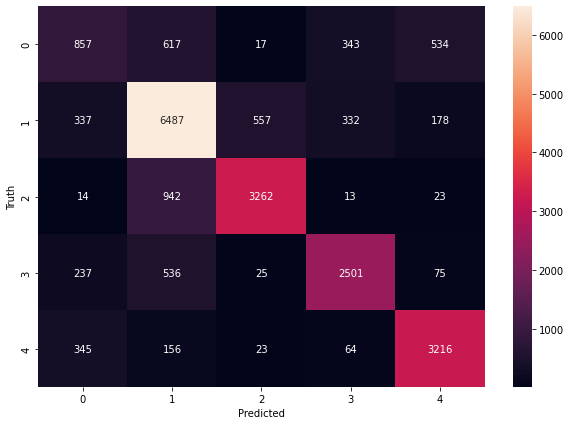

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # here, cm is called to be visualized
plt.xlabel('Predicted')
plt.ylabel('Truth')